# Exercise 18 – Simulations and Basketball

Notebook Written By: WDY (Yale-NUS '24) 
(Come say hi at https://www.linkedin.com/in/dys-profile/)

### Introduction

- Results from data also carry uncertainty. The quantification of uncertainty requires the concept of randomness.

- Simulations provide hands-on experience with randomness. They generate a response variable under an assumed model.

- Today we use the R function sample to implement a simulation for the investigation of a basketball phenomenon.


### What is uncertainty in data?
Until the early 20th century the scientific view of the world was dominated by Newtonian mechanics and determinism, where to every cause there is a reaction. The world was thought of as some kind of complicating but in principle predictably machine.

Then Bohr-Heisenberg introduced causal non-determinism: At its most fundamental level the behaviour of the world cannot be predicted with certainty. We can only make statements of the form “x is likely to occur”, not “x is certain to occur.”

Not everyone was ready to accept this. Einstein: “God does not play dice.”

Does it matter? Whether or not the world is inherently unpredictable, the fact that we never have complete information/knowledge about the world suggests that we might as well treat it as inherently unpredictable (predictive non-determinism).


A random process is an ongoing process in which the next state might depend on the previous state and some element...

In [13]:
outcomes <- c("heads", "tails")

To simulate flipping a fair coin 100 times, you could either run the function sample 100 ties or adjust its size argument which determines how many samples to draw.

### Step 1: Create a vector sim_fair_coin that simulates flipping a fair coin 100 times.

- Compute the proportion of heads in simulating a fair and compare your result with your teammates
- How can you make sim_fair_coin reproducible such that the proportion of heads stays the same when repeatedly evaluating your code?
- Does the next flip in this random process depend on the previous flip or only on psuedo randomness

In [15]:
set.seed(3)

sim_fair_coin <- sample(outcomes, size = 100, replace = TRUE)
table(sim_fair_coin)/length(sim_fair_coin)

# In this simulation, each of the outcomes are independent of the previous outcomes

sim_fair_coin
heads tails 
 0.44  0.56 

In this simulation each of the outcomes is independent of the previous outcomes.

### Step 2: Repeat simulation but now with an unfairly weight coin that we know lands heads only 20% of the time

- What proportion of heads do you obtain?
- Does this proportion vary more or less?

In [18]:
sim_unfair_coin <- sample(outcomes, size = 100, replace = TRUE, prob = c(0.2, 0.8))
table(sim_unfair_coin)/length(sim_unfair_coin)

sim_unfair_coin
heads tails 
 0.18  0.82 

We can adjust the unfairness by adding the argument prob and providing with a vector of probabilities.

prob=c(.2,.8) indicates that for the two elements in the outcomes vector, the first, ‘heads’, is selected with probability .2 and the second, ‘tails’, with probability .8. The default for prob is that each outcome is equally likely.

The proportion of an unfair coin varies less than that of a fair coin. This is because uncertainty is maximized when the proportion of heads versus tails is exactly 50/50.

# Challenge: Analyze Basketball

- Basketball players who make several baskets in succession are described as having a “hot hand”.

- Fans and players have long believed in the hot hand phenomenon, which refutes the assumption that each shot is independent of the next. Instead they believe that previous success can change the psychological attitude and subsequent success rate of a player.

- A 1985 paper by Gilovich et al. collected evidence to show that successive shots are independent events.

- This paper started a great controversy as you can see by Googling “hot hand basketball”.

Goals:

We do not expect to resolve the controversy. But we will apply a simulation approach towards answering questions like this.

- Think about effects of independent and dependent events
- Learn how to simulate shooting streaks in R
- Compare simulation to actual data to determine if hot hand phenomenon is real
- Think about limitations of a simulation in its ability to model reality

We will focus on the player of Kobe Bryant and his performance in the 2009 NBA Finals.

### Step 3: 

In [2]:
load(url("http://www.openintro.org/stat/data/kobe.RData"))

Load a custom function we will be using.

- Do some basic exploration of the new data
- What does a row in this data frame represent
- Which part of the data is most relevant for our hot hand investigation?

In [3]:
head(kobe)

vs,game,quarter,time,description,basket
ORL,1,1,9:47,Kobe Bryant makes 4-foot two point shot,H
ORL,1,1,9:07,Kobe Bryant misses jumper,M
ORL,1,1,8:11,Kobe Bryant misses 7-foot jumper,M
ORL,1,1,7:41,Kobe Bryant makes 16-foot jumper (Derek Fisher assists),H
ORL,1,1,7:03,Kobe Bryant makes driving layup,H
ORL,1,1,6:01,Kobe Bryant misses jumper,M


- Every row records a shot taken by Kobe Bryant.
- If he hit the shot (made a basket) an H, for hit, is recorded in the column named basket. Otherwise an M, for miss, is recorded.

In [4]:
str(kobe)

'data.frame':	133 obs. of  6 variables:
 $ vs         : Factor w/ 1 level "ORL": 1 1 1 1 1 1 1 1 1 1 ...
 $ game       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ quarter    : Factor w/ 5 levels "1","1OT","2",..: 1 1 1 1 1 1 1 1 1 3 ...
 $ time       : Factor w/ 116 levels "00:00.0","00:00.5",..: 114 109 102 100 96 85 64 21 11 91 ...
 $ description: Factor w/ 80 levels "Bryant 3pt Shot: Made (16 PTS) Assist: Bynum (1 AST)  ",..: 40 78 75 27 44 78 52 62 79 45 ...
 $ basket     : chr  "H" "M" "M" "H" ...


How could we use these data for our hot hand investigation?

- Just looking at the string of hits and misses, it can be difficult to gauge whether there was a hot hand.
- One way we can approach this is by considering that hot hand shooters tend to go on streaks.

- Let's define the length of a shooting streak to be no. of consecutive baskets.
- In game 1, Kobe had the following sequence from his attempts as shown below.

In [5]:
kobe$basket[1:9]

[1] "H" "M" "M" "H" "H" "M" "M" "M" "M"

Based on this, we should address a few questions.

Questions: 
- What does a streak length of 1 mean?
- How many hits and misses are in a streak of 1?
- What about a streak length of 0?

Answers:
- A streak of length 1 means that you get 1 hit before a miss
- A streak of length 0 implies you simply miss at first attempt, i.e. no hits.

### Step 4: Visualize the distribution of shooting streaks

- The custom function calc_streak(), which was loaded in with the data, may be used to calculate the lengths of all shooting streaks, and then to look at their distribution.

- Use it to visualize the distribution of shooting streaks. What would be an appropriate visualization, given that shooting streaks are discrete.

- Describe the distribution of Kobe's streak lengths. What was his typical streak length and what was his longest streak.

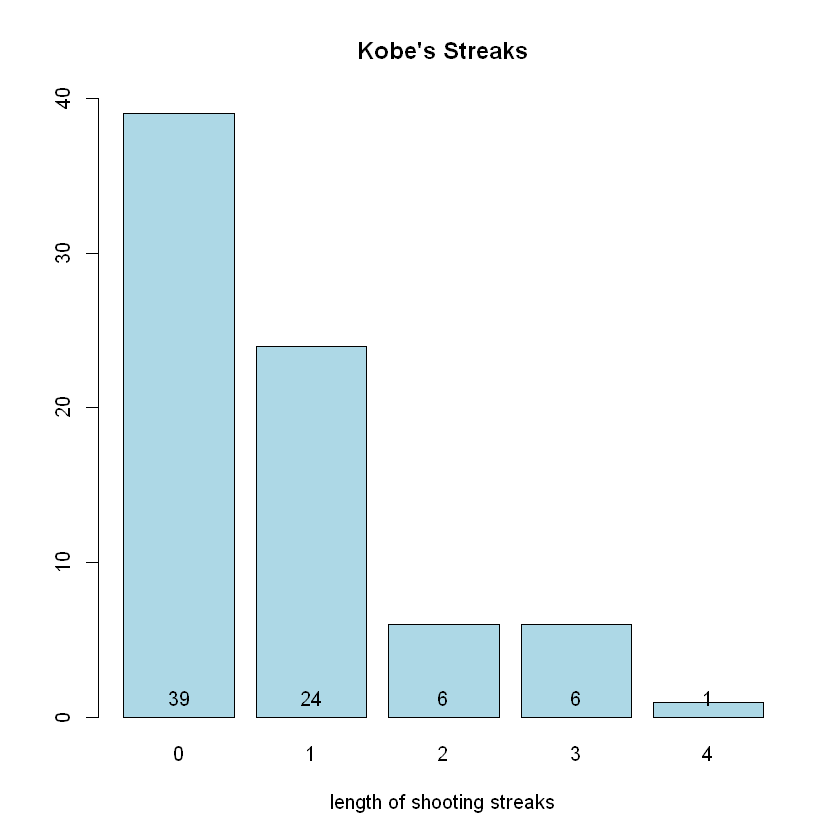

In [6]:
bp <- barplot(table(calc_streak(kobe$basket)),
        main = "Kobe's Streaks",
        ylim = c(0,40),
        col = "lightblue",
        xlab = "length of shooting streaks")

text(bp, 0, round(table(calc_streak(kobe$basket)), 1), pos=3) 


Skewed to the right, with a mode at 0. His longest streak was 4.

Here, a bar plot from a table is preferable to a histogram since our variable is discrete - counts - instead of continuous.

### Step 5: Compute the relative frequencies of Kobe's streak lengths

In [7]:
kobe_streak <- calc_streak(kobe$basket)

table(kobe_streak) * 100 / length(kobe_streak)

kobe_streak
        0         1         2         3         4 
51.315789 31.578947  7.894737  7.894737  1.315789 

We’ve shown that Kobe had some long shooting streaks, but are they long enough to support the belief that he had hot hands?

What can we compare them to?

Think back to the activities from the beginning of today’s class.

### Independence: Not having hot hands

Two processes are independent if the outcome of one process doesn’t affect the outcome of the second.

If each shot that a player takes is an independent process, having made or missed your first shot will not affect the probability that you will make or miss your second shot.

A shooter with a hot hand will have shots that are not independent of one another. Psychologically, she is “in the zone”. Specifically, if the shooter makes her first shot, the hot hand model says she will have a higher probability of making her second shot.

If there are no hot hands, then Kobe Bryant should be an independent shooter.

We shall generate shots of an independent shooter with a simulation to test this.

### Simulating an independent shooter

An independent shooter is modeled by simulating hitting or missing a basket 133 times.

We will record the streak lengths computed from the 133 hits and misses.

We will align the success rate of our independent shooter with Kobe’s.

For an independent shooter each shot has the same success probability. As an estimate of the success probability of an independent Kobe Bryant let’s use the proportion of hits out of the 133 shots in our data.

Our simulation does not precisely reflect a real final series, e.g.:

We will be counting shooting streaks across quarters and games.
If opponent players believe in the hot hands phenomenon they would likely guard a player more once they believe he starts a streak. This would influence the success probability.

### Step 6: Generate shots of an independent shooter with a simulation

- Generate shots of an independent shooter with a simulation.
- What probabilities do you use in your simulation? How many shots do you include in the simulation?

[1] 0.4360902

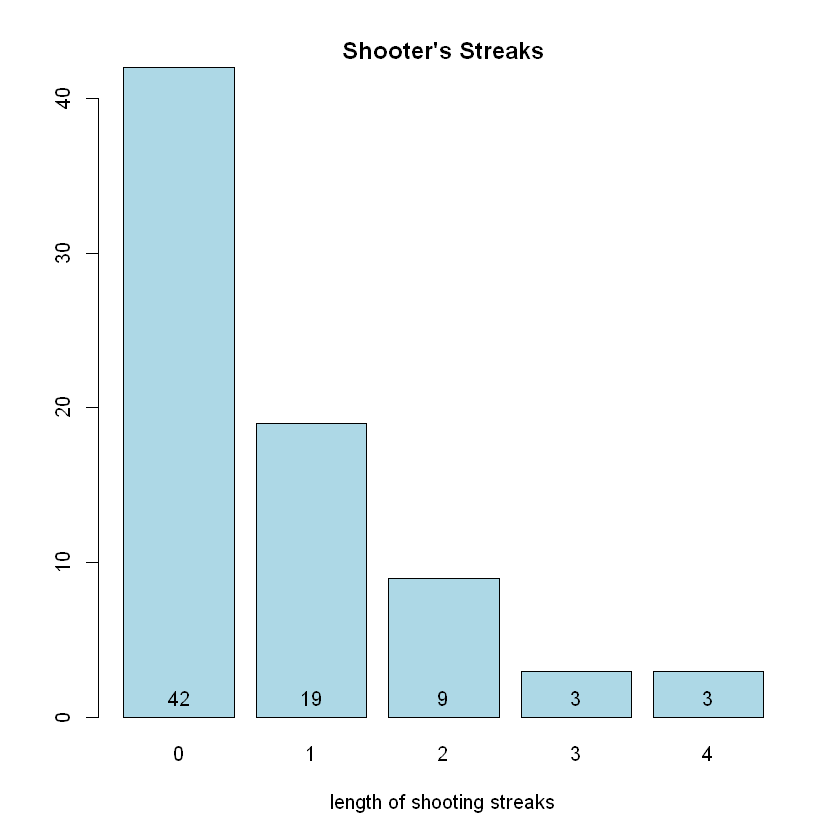

In [8]:
set.seed(1)

# CREATE OUTCOMES
outcomes <- c("H", "M")

# SET PROBABILITIES OF SHOTS TO BE EQUAL TO KOBE
hit_prop <- mean(kobe$basket == "H")
hit_prop

# NOW SIMULATE THE SHOTS PROBABILITIES
sim_basket <- sample(outcomes, 
                     size = length(kobe$basket), 
                     replace = TRUE, 
                     prob = c(hit_prop, 1 - hit_prop))

# CALCULATE STREAKS OF SHOOTER INTO A VECTOR
sim_streak <- calc_streak(sim_basket)

# PLOT THE STREAKS OF THE SHOOTER
shooterbp <- barplot(table(sim_streak),
        main = "Shooter's Streaks",
        ylim = c(0,40),
        col = "lightblue",
        xlab = "length of shooting streaks")

# ADD LABELS TO THE GRAPH
text(shooterbp, 0, round(table(sim_streak), 1), pos=3)


### Step 7: Find the statistics of the independent shooter

- What is the independent shooter's typical streak length?
- What is the independent shooter's longest streak length?


In [9]:
mean(sim_streak)
max(sim_streak)

[1] 0.7631579

[1] 4

### Step 8: Compare the 2 shooters' streak distributions

Create a visualization of kobe_streak and sim_streak to compare our simulated independent shooter with Kobe Bryant with regards to their “hot handedness”.

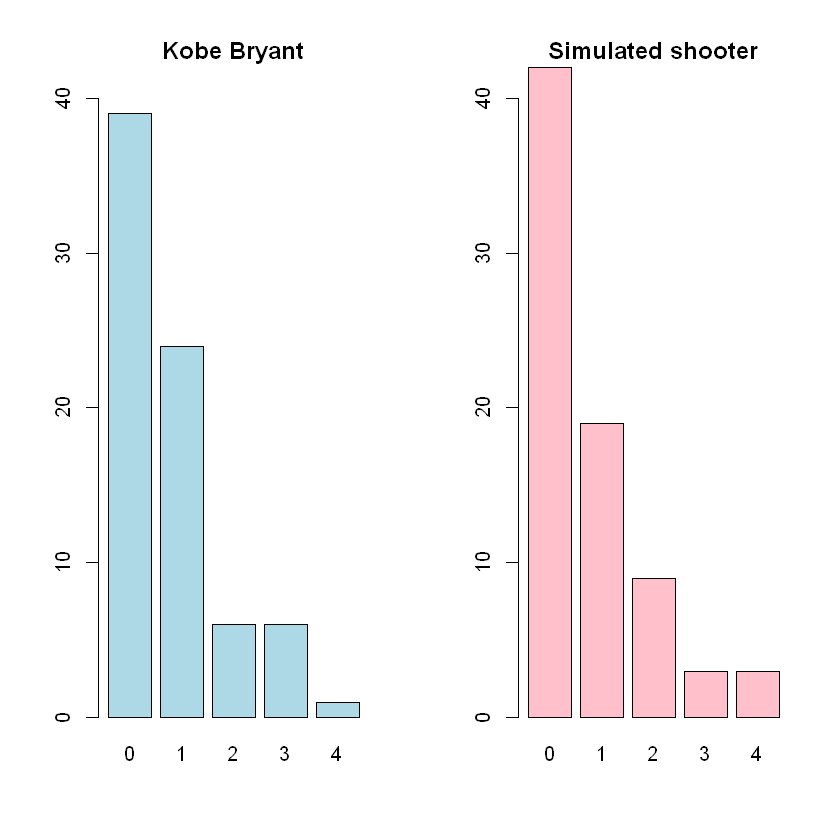

In [71]:
par(mfrow = c(1,2))

barplot(table(kobe_streak),
        main = "Kobe Bryant",
        col = "lightblue", 
        ylim = c(0,40))

barplot(table(sim_streak),
        main = "Simulated shooter", 
        col = "pink", 
        ylim = c(0, 40))

### Discussion
- Do we have evidence in favor of Kobe Bryant having a hot hand?
- Do we have evidence against it?
- Can we generate more evidence one way or the other with the tools we have discussed?

### Discussion – remarks
- Our example does not show strong evidence of a hot hand: Both the simulated data and Kobe’s shots have similar streak lengths.
- Evidence against any hot hand is difficult to establish because the hot hand effect could be tiny to the point of being indiscernible.
- Repeated simulations yield different distributions of streak lengths. Maybe our independent shooter just got lucky. Repeating the simulation might give us a better sense of whether Kobe’s streak lengths are expected if we assume him to be an independent shooter.